|線形モデルによる回帰|
|:-|

線形モデルは実用的に広く用いられており，この数十年間のあいだ盛んに研究されたモデルである．線形モデルは入力特徴量の**線形関数**を用いて予測を行うものである．

回帰問題では、線形モデルによる一般的な予測式は以下のようになる。
$$
\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b
$$
ここで$x[0]$から$x[p]$は、ある1データポイントの特徴量（この例では特徴量の数は$p+1$）を示し、$w$と$b$は学習されたモデルのパラメータであり、$\hat{y}$はモデルからの学習である。特徴量が一つしかないデータセットであれば次のようになる。
$$
\hat{y} = w[0] \times x[0] + b
$$

この数式は直線を表している。$w[0]$は傾きを、$b$は$y$切片を意味する。もっと特徴量がある場合には、$w$にはそれぞれの特徴量の軸に対する傾きがはいることになる。別の考え方として、予測されるレスポンスは入力特徴量の重み付き和になると考えることもできる。重みは$w$で表され、負になることもある。  
一次元のwaveデータセットで$w[0]$と$b$を求めてみると、下の図に示したような直線になる。

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

w[0]: 0.393906  b: -0.031804


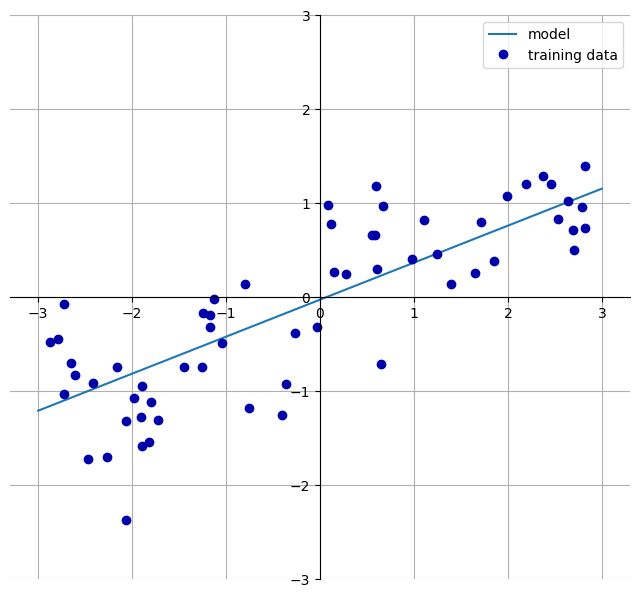

In [18]:
mglearn.plots.plot_linear_regression_wave() # w[0]は傾き、bは切片

線形モデルによる回帰では，傾きw[0]: 0.393906  y切片b: -0.031804 とわかった．


このモデルで作られる直線と、KNeighborsRegressorによる予測とを比べると、直線で予測するのは制約が強すぎると感じるかもしれない。データの細かいディティールがすべて失われているように見えるだろう。ある意味でそれは正しい。このモデルは、ターゲット$y$が、特徴量の線形和で表すことができるという、強い（そして若干非現実的な）仮定を置いているからだ。ただし、１次元のデータを見ただけでゃ、少し歪んだ見方になっているかもしれない。多数の特徴量を持つデータに対しては、線形モデルは非常に強力なのだ。特に、訓練データのデータポイント数よりも特徴量の数のほうが多い場合には、どのような$y$でも完全に訓練データセットの線形関数としてモデル化できる。

---

線形モデルを用いた回帰にはさまざまなアルゴリズムがある。これらのモデルの相違点は、パラメータ$w$と$b$を訓練データから学習する方法と、モデルの複雑さを制御する方法にある。次に、最もよく用いられる線形モデルを用いた回帰手法を見ていこう。

#### <span style="color:orange">線形回帰（通常最小二乗法）</span>

線形回帰，もしくは線形最小二乗法は，最も単純で，最も古典的な線形回帰手法である．

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [20]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


線形回帰（通常最小二乗法）では
傾きlr.coef_: [0.39390555]
y切片lr.intercept_: -0.031804343026759746
とわかった．

訓練セットとテストセットに対する性能を確認する．

In [21]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


R^2が0.66というのはあまりよくないが，訓練セットとテストセットに対する値が非常に近い．これは，おそらくは**適合不足で合って，過剰適合ではない**ことを意味する．このような１次元データセットは，モデルがとても単純なので過剰適合の危険は少ない．

---

しかし、高次元のデータセットに対しては（つまりデータセットが多くの特徴量を持つ場合は）、線形モデルはより強力になるので、過剰適合の可能性が高くなる。LinearRegressionが、boston_housingのデータセットのような、より複雑なデータセットに対してどのような挙動を示すか見てみよう。前述したように、このデータセットには導出された104の特徴量を持つ506のサンプルがある。まず、データセットを読み込み、訓練セットとテストセットに分割する。そして、先ほどと同じように線形回帰モデルを作る。

In [22]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

訓練セットとテストセットのスコアを比べると、訓練データに対しては非常に正確だが、テストセットの$R^2$値はずっと悪いことがわかる。

In [23]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


このように訓練セットとテストセットで性能が大きく異なるのは，過剰適合が起きている明らかな兆候である．したがって，腹圧度を制御できるモデルを探さなければならない．もっとも一般的な手法は**リッジ回帰**である．

#### リッジ回帰

リッジ回帰は線形モデルによる回帰の一つである．予測に用いられる．しかし，リッジ回帰では，係数（w）を，訓練データに対する予測だけでなく，他の制約に対しても最適化する．

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


結果からわかる通り，RidgeモデルはLinearRegressionモデルよりも訓練セットに対するスコアは低いが，テストセットに対するスコアは高い．これは期待された通りである．線形回帰ではデータに対して過剰適合していた．Ridgeは，製薬の強いモデルなので，過剰的具尾の危険は少ない．複雑どの低いモデルは，訓練セットに対する性能は低いが汎化性能は高い．我々が興味を持っているのは汎化性能だけなので，LinearRegressionモデルよりもRidgeモデルをつかったほうがよい．

Ridgeモデルでは，
モデルの簡潔さ（0に近い係数の数）と，訓練セットに対する性能がトレードオフの関係になる，このどちらに重くを置くかは，ユーザがalphaパラメータを用いて指定することができる．

In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


alphaを小さくすると，係数の制約は小さくなる．（訓練精度が上がり，テスト精度（汎化性能）が下がることで過剰適合に近づく）alphaのせが非常に小さい値になると，係数への制約はほとんどなくなり，LinearRegressionと同じような挙動となる．

In [26]:
rigid01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(rigid01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rigid01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


このケースでは，alpha=0.1がうまくいっているように見える，alpphaが大きい場合は小さな場合よりもcoef_の要素の絶対値が小さくなることが期待される．この期待が正しいことは以下で確認できる．

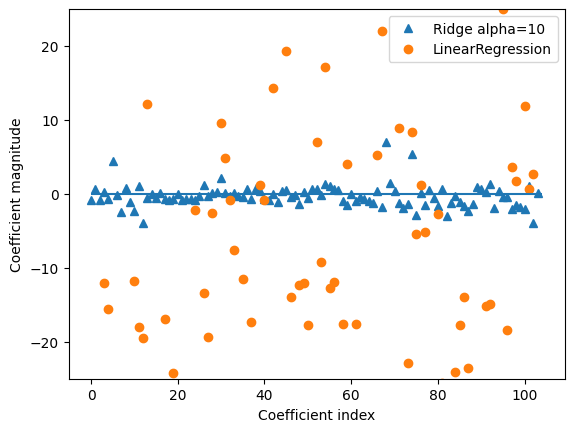

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
# plt.plot(rigid01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
ax.set_ylim(-25, 25)
plt.legend()